In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import DBSCAN




file = pd.read_csv("C:\\Users\\Jonathan\\Downloads\\PORQ_evocativeVideoTask_LIWCOutput (1).csv")





In [109]:
#Dropping WC since prolly not useful


from sklearn import preprocessing
Bad = []
y = file.drop(['WC'],axis=1)
for (columnName, columnData) in y.iteritems():
     for item in columnData:
          if(isinstance(item,int) and item>100):
               Bad.append(columnName)
                
for item in Bad:
    float_array = y[item].values.astype(float)
    X_scaled = preprocessing.scale(float_array)
    y[item]= pd.DataFrame(X_scaled)
        

    

In [110]:
num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(y.select_dtypes(include=num_colums).columns)
y = y[numerical_columns]

In [111]:
correlated_features = set()
correlation_matrix = y.corr()

set()

In [113]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            print(i)
            correlated_features.add(colname)

67
79
83
83


In [114]:
correlation_matrix

,Segment,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,label_clustering
Segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Analytic,NaN,1.000000,0.385430,-0.204375,-0.092538,0.142131,0.133521,-0.387450,-0.402254,-0.764972,...,0.007455,-0.002748,-0.093017,NaN,0.005213,-0.027935,-0.396948,NaN,0.027841,NaN
Clout,NaN,0.385430,1.000000,-0.639631,-0.072392,0.145378,-0.000491,-0.153681,-0.057258,-0.264741,...,-0.040689,-0.019695,-0.010004,NaN,0.007491,0.002628,-0.161364,NaN,-0.069907,NaN
Authentic,NaN,-0.204375,-0.639631,1.000000,0.007889,-0.043676,-0.006348,0.228555,0.075689,0.203748,...,-0.010919,-0.004480,0.018928,NaN,-0.019871,-0.016271,0.101903,NaN,0.004953,NaN
Tone,NaN,-0.092538,-0.072392,0.007889,1.000000,-0.077959,0.008206,0.112365,-0.097925,0.024142,...,0.005531,0.014070,-0.030138,NaN,-0.017178,0.007368,0.034592,NaN,0.073582,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Quote,NaN,-0.027935,0.002628,-0.016271,0.007368,-0.003513,-0.090998,0.035315,0.016621,0.037995,...,0.000303,0.001560,0.002436,NaN,-0.073474,1.000000,0.014261,NaN,0.009570,NaN
Apostro,NaN,-0.396948,-0.161364,0.101903,0.034592,-0.178953,-0.071163,0.140065,0.250055,0.338655,...,-0.015356,0.051684,0.089892,NaN,-0.034470,0.014261,1.000000,NaN,-0.014626,NaN
Parenth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OtherP,NaN,0.027841,-0.069907,0.004953,0.073582,-0.111503,0.126540,-0.281270,-0.303784,-0.089326,...,0.671532,0.013649,-0.005328,NaN,-0.142850,0.009570,-0.014626,NaN,1.000000,NaN


In [115]:
y.drop(labels=correlated_features, axis=1, inplace=True)

In [116]:
from sklearn.cluster import KMeans 
clusters = 6
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(y)

KMeans(n_clusters=6)

In [50]:
kmeans.labels_.shape

(1730,)

In [52]:
file

,Filename,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,7001_joy_baby_describe.txt,1,92,62.99,86.15,4.59,99.00,9.20,8.70,93.48,...,6.52,0.0,0.0,0.0,0,6.52,0.0,4.35,0,0.0
1,7001_joy_baby_feel.txt,1,36,4.69,50.00,74.76,99.00,7.20,19.44,100.00,...,5.56,0.0,0.0,0.0,0,2.78,0.0,2.78,0,0.0
2,7001_joy_dogfail_describe.txt,1,57,18.82,80.98,1.00,1.00,11.40,15.79,80.70,...,10.53,0.0,0.0,0.0,0,12.28,0.0,0.00,0,0.0
3,7001_joy_grandpa_describe.txt,1,75,48.90,99.00,1.00,9.41,8.33,16.00,94.67,...,4.00,0.0,0.0,0.0,0,6.67,0.0,10.67,0,0.0
4,7001_joy_phone_describe.txt,1,80,92.03,96.95,27.99,99.00,16.00,20.00,92.50,...,6.25,0.0,0.0,0.0,0,5.00,0.0,3.75,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,8110_neg_heart_feel.txt,1,56,93.26,70.40,30.01,97.85,28.00,8.93,92.86,...,33.93,0.0,0.0,0.0,0,0.00,0.0,1.79,0,0.0
1726,8110_neg_nuts_describe.txt,1,63,85.16,50.00,19.65,99.00,21.00,15.87,93.65,...,23.81,0.0,0.0,0.0,0,1.59,0.0,3.17,0,0.0
1727,8110_neg_nuts_feel.txt,1,52,43.96,28.20,1.00,5.37,17.33,15.38,90.38,...,23.08,0.0,0.0,0.0,0,3.85,0.0,0.00,0,0.0
1728,8110_neu_yawn_describe.txt,1,56,68.29,36.03,30.01,97.85,18.67,10.71,92.86,...,26.79,0.0,0.0,0.0,0,0.00,0.0,5.36,0,0.0


In [121]:
y.drop(labels="label_clustering", axis = 1)

,Segment,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Period,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,1,62.99,86.15,4.59,99.00,9.20,8.70,93.48,55.43,14.13,...,10.87,0.0,0.0,0.0,0,6.52,0.0,4.35,0,0.0
1,1,4.69,50.00,74.76,99.00,7.20,19.44,100.00,44.44,22.22,...,13.89,0.0,0.0,0.0,0,2.78,0.0,2.78,0,0.0
2,1,18.82,80.98,1.00,1.00,11.40,15.79,80.70,54.39,8.77,...,8.77,0.0,0.0,0.0,0,12.28,0.0,0.00,0,0.0
3,1,48.90,99.00,1.00,9.41,8.33,16.00,94.67,58.67,20.00,...,12.00,0.0,0.0,0.0,0,6.67,0.0,10.67,0,0.0
4,1,92.03,96.95,27.99,99.00,16.00,20.00,92.50,57.50,12.50,...,6.25,0.0,0.0,0.0,0,5.00,0.0,3.75,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1,93.26,70.40,30.01,97.85,28.00,8.93,92.86,44.64,16.07,...,3.57,0.0,0.0,0.0,0,0.00,0.0,1.79,0,0.0
1726,1,85.16,50.00,19.65,99.00,21.00,15.87,93.65,49.21,9.52,...,4.76,0.0,0.0,0.0,0,1.59,0.0,3.17,0,0.0
1727,1,43.96,28.20,1.00,5.37,17.33,15.38,90.38,51.92,11.54,...,5.77,0.0,0.0,0.0,0,3.85,0.0,0.00,0,0.0
1728,1,68.29,36.03,30.01,97.85,18.67,10.71,92.86,46.43,10.71,...,5.36,0.0,0.0,0.0,0,0.00,0.0,5.36,0,0.0


In [122]:
y

,Segment,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,label_clustering
0,1,62.99,86.15,4.59,99.00,9.20,8.70,93.48,55.43,14.13,...,0.0,0.0,0.0,0,6.52,0.0,4.35,0,0.0,-1
1,1,4.69,50.00,74.76,99.00,7.20,19.44,100.00,44.44,22.22,...,0.0,0.0,0.0,0,2.78,0.0,2.78,0,0.0,-1
2,1,18.82,80.98,1.00,1.00,11.40,15.79,80.70,54.39,8.77,...,0.0,0.0,0.0,0,12.28,0.0,0.00,0,0.0,-1
3,1,48.90,99.00,1.00,9.41,8.33,16.00,94.67,58.67,20.00,...,0.0,0.0,0.0,0,6.67,0.0,10.67,0,0.0,-1
4,1,92.03,96.95,27.99,99.00,16.00,20.00,92.50,57.50,12.50,...,0.0,0.0,0.0,0,5.00,0.0,3.75,0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1,93.26,70.40,30.01,97.85,28.00,8.93,92.86,44.64,16.07,...,0.0,0.0,0.0,0,0.00,0.0,1.79,0,0.0,-1
1726,1,85.16,50.00,19.65,99.00,21.00,15.87,93.65,49.21,9.52,...,0.0,0.0,0.0,0,1.59,0.0,3.17,0,0.0,-1
1727,1,43.96,28.20,1.00,5.37,17.33,15.38,90.38,51.92,11.54,...,0.0,0.0,0.0,0,3.85,0.0,0.00,0,0.0,-1
1728,1,68.29,36.03,30.01,97.85,18.67,10.71,92.86,46.43,10.71,...,0.0,0.0,0.0,0,0.00,0.0,5.36,0,0.0,-1


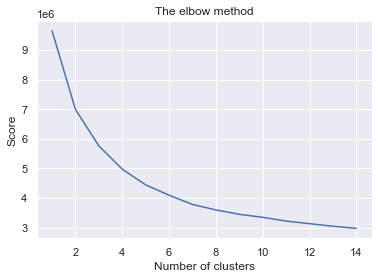

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
yval = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(y)
    yval.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 15), yval)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Score') #within cluster sum of squares
plt.show()

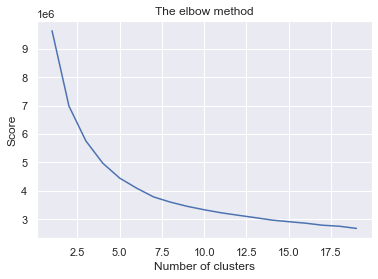

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
yval = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(y)
    yval.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 20), yval)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Score') #within cluster sum of squares
plt.show()

In [106]:
import random
from deap import creator, base, tools, algorithms

In [56]:
!pip install deap

In [58]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()


In [59]:
# Each gene (cluster) is assigned 1 or 0
toolbox.register("attr_bool", random.randint, 0, 1)
# total genes in a chromosome(individual) = set to 100 (the more genes the better result)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100) 
# creating population from all the chromosomes
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# eveluate each individual
def evalOneMax(individual):
    return sum(individual),

# evaluation of each chromosome
toolbox.register("evaluate", evalOneMax)
# mating / cross-over of two chromosomes
toolbox.register("mate", tools.cxTwoPoint)
# mutation with mutation probability = 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# tournament selection with size =3
toolbox.register("select", tools.selTournament, tournsize=3)

# creating total population of size 300
population = toolbox.population(n=300)

# next generation size = 40
NGEN=40
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.5)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    
# selecting top 10 best chromosomes    
top10 = tools.selBest(population, k=10)

In [71]:
clustering = DBSCAN(eps=3, min_samples=2).fit(y)

In [90]:
y['label_clustering'] = clustering.labels_

In [88]:
n_clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)

In [83]:
n_noise_ = list(clustering.labels_).count(-1)

In [89]:
print('Estimated number of clusters: %d' % n_clusters)

Estimated number of clusters: 0


In [98]:
y

,Segment,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,label,label_kmeans,label_clustering
0,1,62.99,86.15,4.59,99.00,9.20,8.70,93.48,55.43,14.13,...,0.0,0,6.52,0.0,4.35,0,0.0,8,0,-1
1,1,4.69,50.00,74.76,99.00,7.20,19.44,100.00,44.44,22.22,...,0.0,0,2.78,0.0,2.78,0,0.0,6,3,-1
2,1,18.82,80.98,1.00,1.00,11.40,15.79,80.70,54.39,8.77,...,0.0,0,12.28,0.0,0.00,0,0.0,1,5,-1
3,1,48.90,99.00,1.00,9.41,8.33,16.00,94.67,58.67,20.00,...,0.0,0,6.67,0.0,10.67,0,0.0,5,5,-1
4,1,92.03,96.95,27.99,99.00,16.00,20.00,92.50,57.50,12.50,...,0.0,0,5.00,0.0,3.75,0,0.0,8,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1,93.26,70.40,30.01,97.85,28.00,8.93,92.86,44.64,16.07,...,0.0,0,0.00,0.0,1.79,0,0.0,8,0,-1
1726,1,85.16,50.00,19.65,99.00,21.00,15.87,93.65,49.21,9.52,...,0.0,0,1.59,0.0,3.17,0,0.0,8,0,-1
1727,1,43.96,28.20,1.00,5.37,17.33,15.38,90.38,51.92,11.54,...,0.0,0,3.85,0.0,0.00,0,0.0,4,5,-1
1728,1,68.29,36.03,30.01,97.85,18.67,10.71,92.86,46.43,10.71,...,0.0,0,0.00,0.0,5.36,0,0.0,7,0,-1


In [123]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(y)

In [124]:
cluster_labels

array([ 0, -1, -1, ..., -1, -1, -1], dtype=int64)

In [108]:
y

,Segment,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,label_clustering
0,1,62.99,86.15,4.59,99.00,9.20,8.70,93.48,55.43,14.13,...,0.0,0.0,0.0,0,6.52,0.0,4.35,0,0.0,-1
1,1,4.69,50.00,74.76,99.00,7.20,19.44,100.00,44.44,22.22,...,0.0,0.0,0.0,0,2.78,0.0,2.78,0,0.0,-1
2,1,18.82,80.98,1.00,1.00,11.40,15.79,80.70,54.39,8.77,...,0.0,0.0,0.0,0,12.28,0.0,0.00,0,0.0,-1
3,1,48.90,99.00,1.00,9.41,8.33,16.00,94.67,58.67,20.00,...,0.0,0.0,0.0,0,6.67,0.0,10.67,0,0.0,-1
4,1,92.03,96.95,27.99,99.00,16.00,20.00,92.50,57.50,12.50,...,0.0,0.0,0.0,0,5.00,0.0,3.75,0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1,93.26,70.40,30.01,97.85,28.00,8.93,92.86,44.64,16.07,...,0.0,0.0,0.0,0,0.00,0.0,1.79,0,0.0,-1
1726,1,85.16,50.00,19.65,99.00,21.00,15.87,93.65,49.21,9.52,...,0.0,0.0,0.0,0,1.59,0.0,3.17,0,0.0,-1
1727,1,43.96,28.20,1.00,5.37,17.33,15.38,90.38,51.92,11.54,...,0.0,0.0,0.0,0,3.85,0.0,0.00,0,0.0,-1
1728,1,68.29,36.03,30.01,97.85,18.67,10.71,92.86,46.43,10.71,...,0.0,0.0,0.0,0,0.00,0.0,5.36,0,0.0,-1


In [125]:
y["label_kmeans"] = kmeans.labels_
y["hdbscan"] = cluster_labels

In [126]:
y

,Segment,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,label_clustering,label_kmeans,hdbscan
0,1,62.99,86.15,4.59,99.00,9.20,8.70,93.48,55.43,14.13,...,0.0,0,6.52,0.0,4.35,0,0.0,-1,4,0
1,1,4.69,50.00,74.76,99.00,7.20,19.44,100.00,44.44,22.22,...,0.0,0,2.78,0.0,2.78,0,0.0,-1,1,-1
2,1,18.82,80.98,1.00,1.00,11.40,15.79,80.70,54.39,8.77,...,0.0,0,12.28,0.0,0.00,0,0.0,-1,0,-1
3,1,48.90,99.00,1.00,9.41,8.33,16.00,94.67,58.67,20.00,...,0.0,0,6.67,0.0,10.67,0,0.0,-1,0,1
4,1,92.03,96.95,27.99,99.00,16.00,20.00,92.50,57.50,12.50,...,0.0,0,5.00,0.0,3.75,0,0.0,-1,4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1,93.26,70.40,30.01,97.85,28.00,8.93,92.86,44.64,16.07,...,0.0,0,0.00,0.0,1.79,0,0.0,-1,4,-1
1726,1,85.16,50.00,19.65,99.00,21.00,15.87,93.65,49.21,9.52,...,0.0,0,1.59,0.0,3.17,0,0.0,-1,4,-1
1727,1,43.96,28.20,1.00,5.37,17.33,15.38,90.38,51.92,11.54,...,0.0,0,3.85,0.0,0.00,0,0.0,-1,0,-1
1728,1,68.29,36.03,30.01,97.85,18.67,10.71,92.86,46.43,10.71,...,0.0,0,0.00,0.0,5.36,0,0.0,-1,4,-1
